In [78]:
%pip install scipy
%pip install sklearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scipy in c:\users\sarah\appdata\local\programs\python\python312\lib\site-packages (1.14.1)




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [79]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [80]:
#Carga desde un archivo .csv sin indice
df = pd.read_csv('Base_Paris_LIMPIA.csv')
df.head(5)

,Unnamed: 0,id,scrape_id,host_id,latitude,longitude,listing_url,last_scraped,source,name,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month
0,0,3109,20240906025355,3631,48.831910,2.318700,https://www.airbnb.com/rooms/3109,2024-09-11,city scrape,zen and calm,...,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.05
1,1,5396,20240906025355,7903,48.852470,2.358350,https://www.airbnb.com/rooms/5396,2024-09-13,city scrape,Your perfect Paris studio on Île Saint-Louis,...,4.61,4.64,4.59,4.81,4.84,4.96,4.59,1.0,1.0,2.23
2,2,7397,20240906025355,2626,48.859090,2.353150,https://www.airbnb.com/rooms/7397,2024-09-06,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,...,4.73,4.81,4.45,4.92,4.89,4.93,4.74,1.0,1.0,2.20
3,3,7964,20240906025355,22155,48.874170,2.342450,https://www.airbnb.com/rooms/7964,2024-09-10,previous scrape,Sunny apartment with balcony,...,4.80,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.03
4,4,241715,20240906025355,3342097,48.893464,2.378341,https://www.airbnb.com/rooms/241715,2024-09-11,city scrape,Big Cosy Appartement with 100 m2 Terrace in Paris,...,4.80,4.80,4.70,4.90,4.90,4.90,4.70,1.0,1.0,0.80


In [81]:
#Sustituir valores nulos por un string en  concreto 
df["host_response_rate"] =df["host_response_rate"].replace('No captured',0) 
# Elimina cualquier símbolo no numérico (por ejemplo, '%') y convierte a tipo float
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

#Sustituir valores nulos por un string en  concreto 
df["host_acceptance_rate"] =df["host_acceptance_rate"].replace('No captured',0) 
# Elimina cualquier símbolo no numérico (por ejemplo, '%') y convierte a tipo float
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float)


In [82]:
#Realizamos una copia del dataframe
data=df.copy()

#Sustituir valores nulos con promedio o media
df["host_response_rate"]=df["host_response_rate"].fillna(round(data["host_response_rate"].mean(),1))
df["host_acceptance_rate"]=df["host_acceptance_rate"].fillna(round(data["host_acceptance_rate"].mean(),1))

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95461 entries, 0 to 95460
Data columns (total 72 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   95461 non-null  int64  
 1   id                                           95461 non-null  int64  
 2   scrape_id                                    95461 non-null  int64  
 3   host_id                                      95461 non-null  int64  
 4   latitude                                     95461 non-null  float64
 5   longitude                                    95461 non-null  float64
 6   listing_url                                  95461 non-null  object 
 7   last_scraped                                 95461 non-null  object 
 8   source                                       95461 non-null  object 
 9   name                                         95461 non-null  object 
 10

In [84]:
cuantitativas=data.iloc[ : , 40:71]
cuantitativas

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes
0,1.0,1.0,2.0,1.0,1.0,1.0,113.0,2.0,30.0,2.0,...,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0
1,2.0,4.0,2.0,1.0,0.0,1.0,95.0,2.0,730.0,2.0,...,0.0,4.61,4.64,4.59,4.81,4.84,4.96,4.59,1.0,1.0
2,1.0,10.0,4.0,1.0,2.0,1.0,145.0,2.6,130.0,2.0,...,0.0,4.73,4.81,4.45,4.92,4.89,4.93,4.74,1.0,1.0
3,1.0,1.0,3.0,1.0,2.0,1.5,171.9,7.0,365.0,7.0,...,0.0,4.80,5.00,5.00,5.00,5.00,5.00,5.00,1.0,1.0
4,1.0,2.0,6.0,1.0,3.0,0.0,450.0,5.0,120.0,5.0,...,0.0,4.80,4.80,4.70,4.90,4.90,4.90,4.70,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95456,2.0,3.0,4.0,1.0,1.0,2.0,77.0,1.0,365.0,1.0,...,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,2.0,2.0
95457,1.4,7.0,6.0,1.0,3.0,3.0,171.9,2.0,365.0,2.0,...,0.0,4.80,4.80,4.70,4.90,4.90,4.90,4.70,1.2,1.0
95458,1.4,2.0,1.0,1.0,1.3,1.0,38.0,1.0,365.0,1.0,...,0.0,4.80,4.80,4.70,4.90,4.90,4.90,4.70,1.2,0.0
95459,1.4,2.0,1.0,1.0,1.3,2.0,43.0,2.6,1125.0,2.5,...,0.0,4.80,4.80,4.70,4.90,4.90,4.90,4.70,1.2,1.0


In [85]:
variables=data.iloc[ : , [19,20,41,42,71,46]]
variables

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
0,NaN,67.0,1.0,2.0,0.05,113.0
1,100.0,94.0,4.0,2.0,2.23,95.0
2,100.0,67.0,10.0,4.0,2.20,145.0
3,NaN,0.0,1.0,3.0,0.03,171.9
4,NaN,NaN,2.0,6.0,0.80,450.0
...,...,...,...,...,...,...
95456,100.0,99.0,3.0,4.0,1.00,77.0
95457,100.0,99.0,7.0,6.0,0.80,171.9
95458,99.0,95.0,2.0,1.0,0.80,38.0
95459,27.0,8.0,2.0,1.0,0.80,43.0


In [86]:
#Realizamos una copia del dataframe
data=df.copy()

#Sustituir valores nulos con promedio o media
df["host_response_rate"]=df["host_response_rate"].fillna(round(data["host_response_rate"].mean(),1))
df["host_acceptance_rate"]=df["host_acceptance_rate"].fillna(round(data["host_acceptance_rate"].mean(),1))

c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

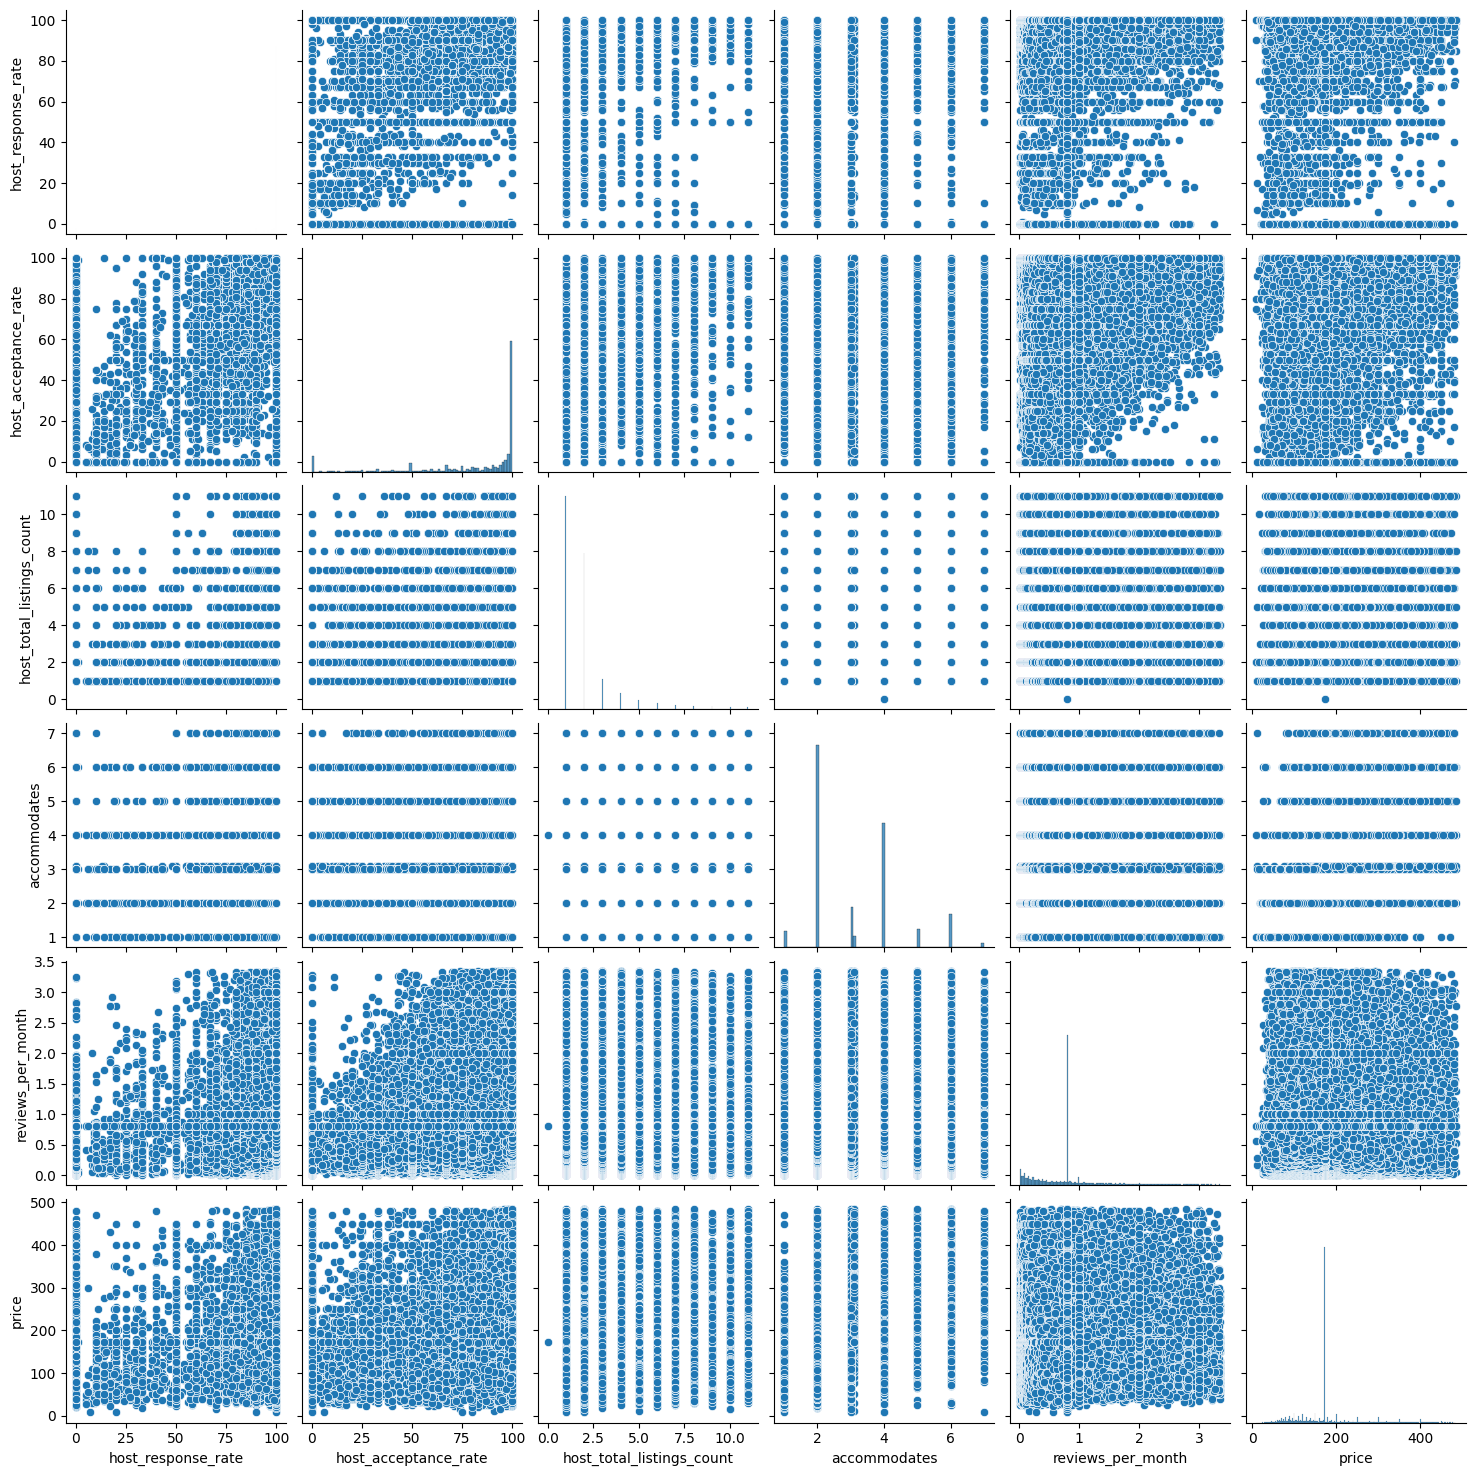

In [87]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(variables)

1. VARIABLE price

In [144]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= data[['host_response_rate']]
Var_Dep= data['price']

In [145]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función cuadrática***

In [146]:
def  func1 (x, a, b, c):
     return (a*x**2 + b*x + c)

#ajustar max de filas
pd.options.display.max_rows=10

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_response_rate'], data['price'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-4.98838518e-03,  8.51523399e-01,  1.36890875e+02])

In [147]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_response_rate'], data['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,host_response_rate
0,172.898602
1,172.159363
2,172.159363
3,172.898602
4,172.898602
...,...
95456,172.159363
95457,172.159363
95458,172.300528
95459,156.245474


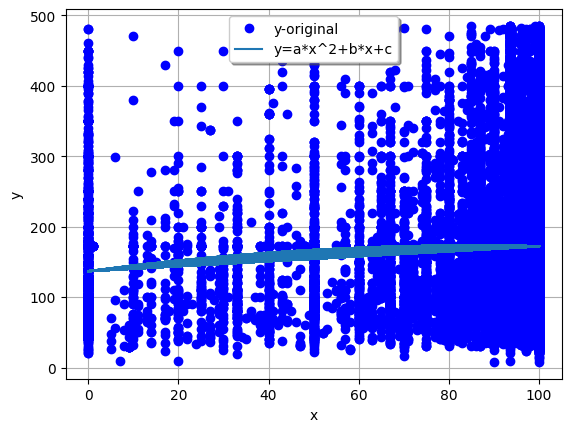

In [148]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [149]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.0033430615873413227

In [150]:
r=np.sqrt(R2)
r

0.057819214689766606

***Modelo2:Funsión Inversa***

In [199]:
def  func1 (x, a, b, c):
     return a * np.exp(b * x) + c
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_response_rate'], data['price'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-4.0451585e-16,  1.0000000e+00,  1.0000000e+00])

In [200]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_response_rate'], data['price'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_response_rate
0,94.5
1,101.0
2,101.0
3,94.5
4,94.5
...,...
95456,101.0
95457,101.0
95458,100.0
95459,28.0


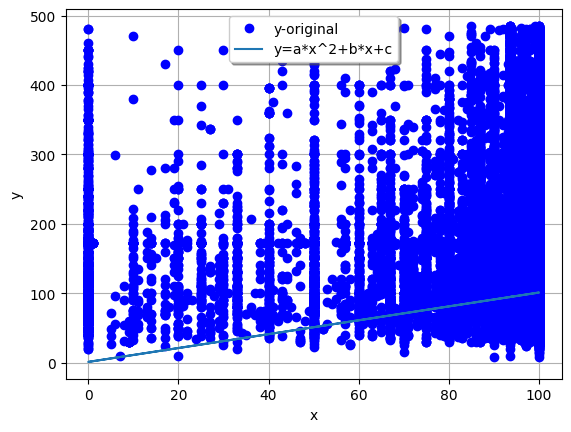

In [201]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [202]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-1.0817789209496227

In [203]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

2. VARIABLE host_acceptance_rate

In [324]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['host_acceptance_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función tangencial***

In [325]:
def  func1 (x, a, b, c):
     return a*np.tan(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\3834653731.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])


array([7.10863844e-03, 8.16817613e+01, 1.00000000e+00])

In [326]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\2177229522.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])


,reviews_per_month
0,5.084106
1,183.185678
2,180.734281
3,3.450459
4,66.349959
...,...
95456,82.688870
95457,66.349959
95458,66.349959
95459,66.349959


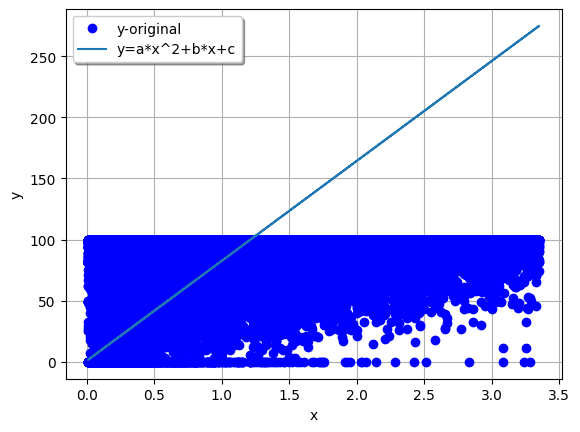

In [327]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [328]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-4.814835059223336

In [329]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo2: Función logaritmica***

In [330]:
def  func1 (x, a, b, c):
     return a*np.log(x) + b

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\3137541921.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])


array([ 2.72847494, 83.33913892,  1.        ])

In [331]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\2177229522.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['reviews_per_month'], data['host_acceptance_rate'])


,reviews_per_month
0,5.173778
1,200.414713
2,197.551924
3,3.502630
4,69.417535
...,...
95456,87.067614
95457,69.417535
95458,69.417535
95459,69.417535


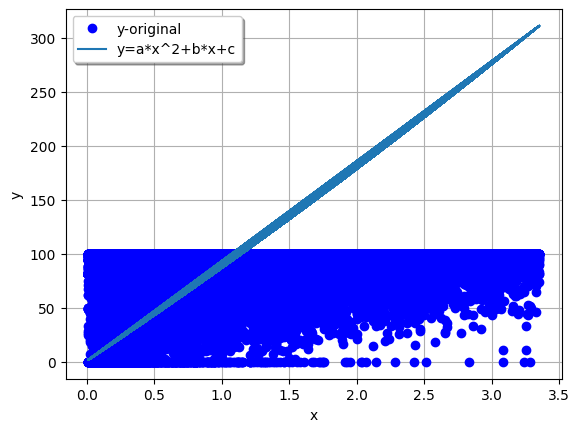

In [332]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [333]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-5.771947376294465

In [334]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

3. VARIABLE host_total_listings_count

In [418]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['host_total_listings_count']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función exponencial***

In [419]:
def  func1 (x, a, b, c,ax,bx):
     return a * np.exp(b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\281033678.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])


array([9.73526208e-27, 9.99999979e-01, 2.83060701e+09, 1.00000000e+00,
       1.00000000e+00])

In [420]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1145385212.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])


,host_acceptance_rate
0,2.830607e+09
1,2.830607e+09
2,2.830607e+09
3,2.830607e+09
4,2.830607e+09
...,...
95456,2.830607e+09
95457,2.830607e+09
95458,2.830607e+09
95459,2.830607e+09


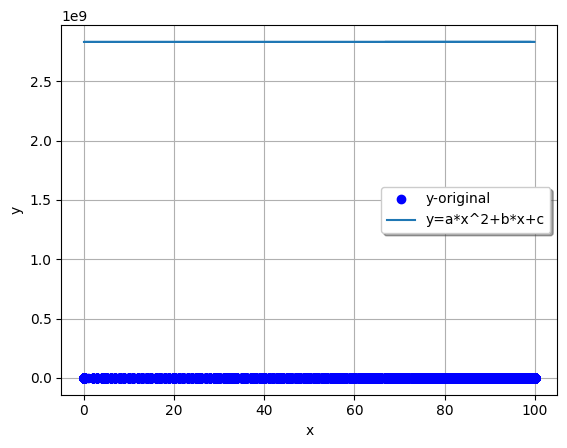

In [421]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [422]:
#Coeficiente de determinación del modelo

R2 = r2_score(y,yfit1) 
R2

-2.9216861280359224e+18

In [423]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo 2: Función cociente entre polinomios***

In [424]:
def  func1 (x, a, b, c):
     return (a*x**3 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-5.03855324e-09,  4.05516135e-02,  1.56896106e+00])

In [425]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['host_total_listings_count'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_acceptance_rate
0,4.285897
1,5.380768
2,4.285897
3,1.568961
4,4.881994
...,...
95456,5.583521
95457,5.583521
95458,5.421319
95459,1.893374


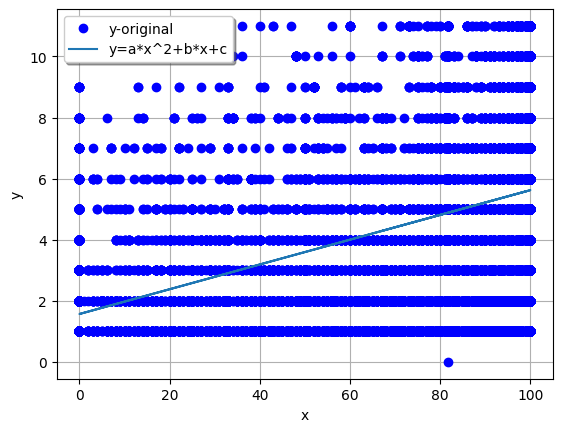

In [426]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [427]:
#Coeficiente de determinación del modelo

R2 = r2_score(y,yfit1) 
R2

-3.2037749453373907

In [428]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

4. VARIABLE accommodates 

In [467]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_acceptance_rate']]
Var_Dep= df['accommodates']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo 1: Función exponencial***

In [476]:
def  func1 (x, a, b, c):
     return a * np.exp(b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([9.73526208e-27, 9.99999979e-01, 3.22689057e+09])

In [477]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_acceptance_rate
0,3.226891e+09
1,3.226891e+09
2,3.226891e+09
3,3.226891e+09
4,3.226891e+09
...,...
95456,3.226891e+09
95457,3.226891e+09
95458,3.226891e+09
95459,3.226891e+09


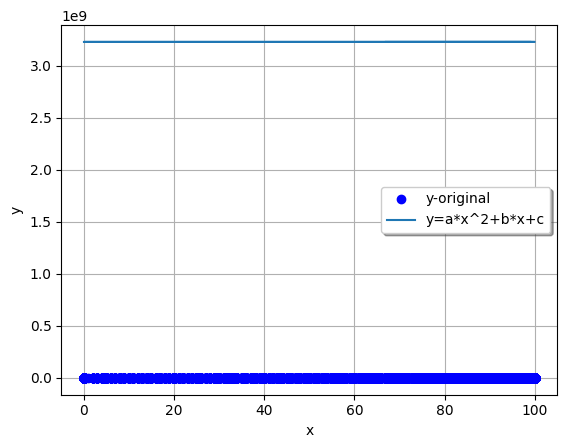

In [478]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [479]:
#Coeficiente de determinación del modelo

R2 = r2_score(y,yfit1) 
R2

-5.679268613457133e+18

In [480]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo 2: Función cociente entre polinomios***

In [536]:
def  func1 (x, a, b, c,ax,bx):
     return (a*x**1.5 + b)/ c*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\662472058.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])


array([-8.99530994e-05,  1.78892057e-01,  2.86820149e+00,  1.00000000e+00,
        1.00000000e+00])

In [537]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\4264709275.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_acceptance_rate'], data['accommodates'])


,host_acceptance_rate
0,14.450170
1,18.889229
2,14.450170
3,2.868201
4,16.883255
...,...
95456,19.696885
95457,19.696885
95458,19.051120
95459,4.293581


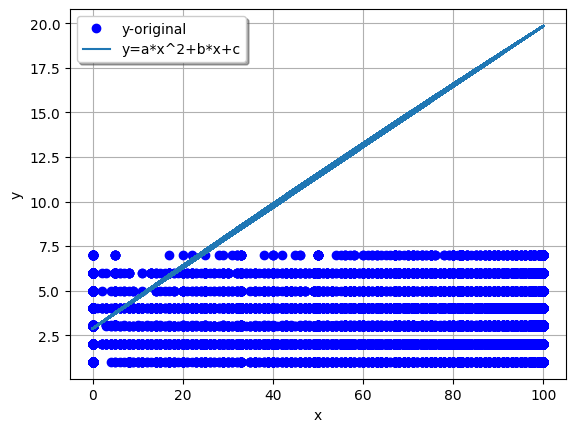

In [538]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [539]:
#Coeficiente de determinación del modelo

R2 = r2_score(y,yfit1) 
R2

-110.94227245320963

In [540]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

5. VARIABLE reviews_per_month

In [560]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_total_listings_count']]
Var_Dep= df['reviews_per_month']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función exponencial***

In [561]:
def  func1 (x, a, b, c,ax,bx):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\2440630946.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])


array([3.94864306, 1.        , 1.        , 1.        , 1.        ])

In [562]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1096240317.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])


,host_total_listings_count
0,5.948643
1,68.178289
2,405.864306
3,5.948643
4,18.794572
...,...
95456,39.537787
95457,201.483510
95458,18.794572
95459,18.794572


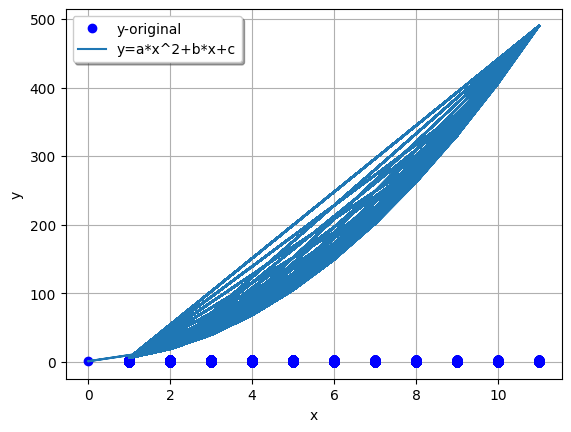

In [563]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [565]:
#Coeficiente de determinación del modelo

R2 = r2_score(yfit1,y) 
R2

-0.21998753659674675

In [566]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo2: Función lineal con producto de coeficientes***

In [567]:
def  func1 (x, a, b, c):
     return (a*x**2 + b*x + c)

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([-0.00371762,  0.04999911,  0.75626715])

In [568]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['reviews_per_month'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_total_listings_count
0,0.802549
1,0.896782
2,0.884496
3,0.802549
4,0.841395
...,...
95456,0.872806
95457,0.924097
95458,0.841395
95459,0.841395


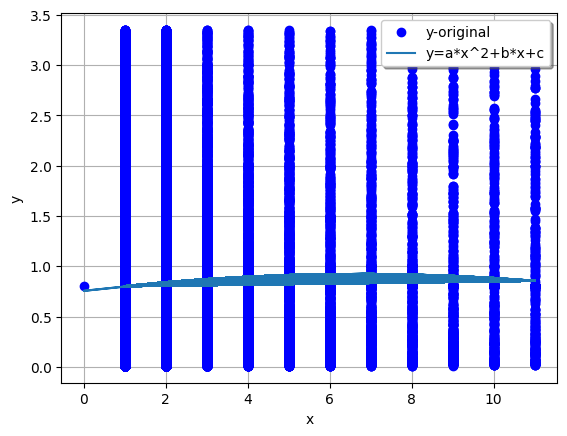

In [569]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [570]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.0027200394898247993

In [571]:
r=np.sqrt(R2)
r

0.05215399783166003

6. VARIABLE host_response_rate

In [572]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['host_total_listings_count']]
Var_Dep= df['host_response_rate']

#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

***Modelo1: Función exponencial***

In [573]:
def  func1 (x, a, b, c):
     return a * np.exp(b * x) + c

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 2.76521202e+02,  5.14418151e-04, -1.83331452e+02])

In [574]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

,host_total_listings_count
0,93.190265
1,4241.009836
2,27468.793882
3,93.190265
4,922.754385
...,...
95456,2305.360909
95457,13366.211042
95458,922.754385
95459,922.754385


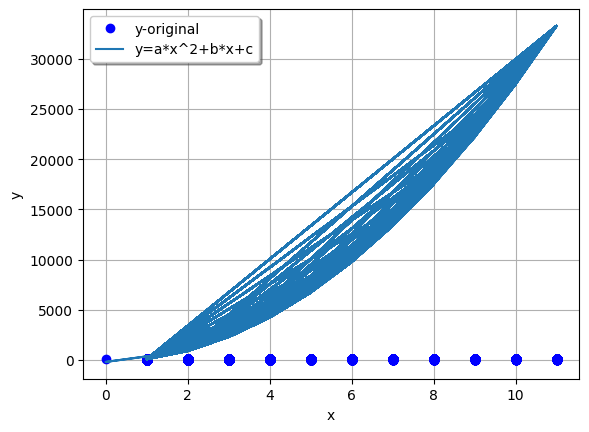

In [575]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [577]:
#Coeficiente de determinación del modelo

R2 = r2_score(yfit1,y) 
R2

-0.14460781508460796

In [578]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan

***Modelo2: Función inversa***

In [579]:
def  func1 (x, a, b, c,ax,bx):
     return 1/a*x

#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\564528962.py:5: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])


array([0.0360672, 1.       , 1.       , 1.       , 1.       ])

In [580]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a*x**2+b*x+c

yfit1

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1104041122.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, _ = curve_fit(func1, data['host_total_listings_count'], data['host_response_rate'])


,host_total_listings_count
0,2.036067
1,5.577075
2,14.606720
3,2.036067
4,3.144269
...,...
95456,4.324605
95457,9.767293
95458,3.144269
95459,3.144269


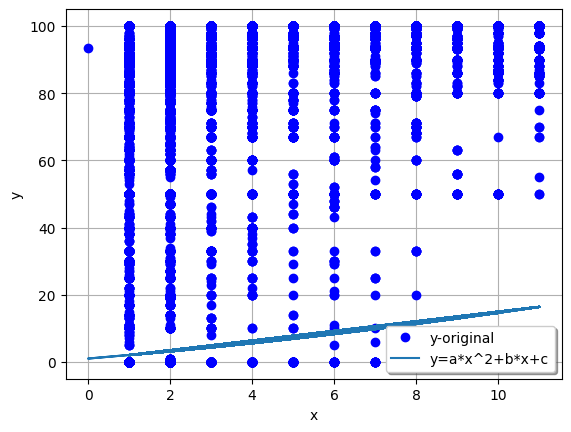

In [581]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [584]:
#Coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

-41.39107376008378

In [585]:
r=np.sqrt(R2)
r

C:\Users\sarah\AppData\Local\Temp\ipykernel_31728\1709574071.py:1: RuntimeWarning: invalid value encountered in sqrt
  r=np.sqrt(R2)


nan